In [1]:
# Author       : Aditi Kaushal
# E-Mail       : aditikaushal712@gmail.com
# Regression Analysis for House Prices

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,6]

In [3]:
#Reading the data.
house = pd.read_csv("Maison.csv")

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
#Checking null-values.
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PRIX        546 non-null    int64
 1   SUPERFICIE  546 non-null    int64
 2   CHAMBRES    546 non-null    int64
 3   SDB         546 non-null    int64
 4   ETAGES      546 non-null    int64
 5   ALLEE       546 non-null    int64
 6   SALLEJEU    546 non-null    int64
 7   CAVE        546 non-null    int64
 8   GAZ         546 non-null    int64
 9   AIR         546 non-null    int64
 10  GARAGES     546 non-null    int64
 11  SITUATION   546 non-null    int64
dtypes: int64(12)
memory usage: 51.3 KB


In [6]:
#Checking some basic statistical details.
house.describe()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [7]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

<AxesSubplot:>

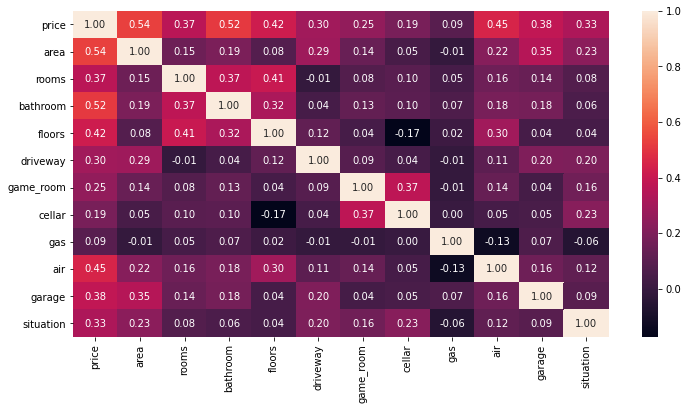

In [8]:
#Correlation check.
sns.heatmap(house.corr(),annot=True,fmt='.2f')

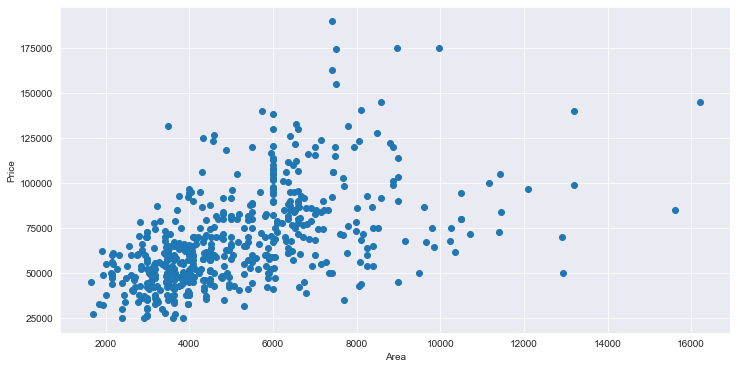

In [9]:
#Checking if there is a linear relationship between area and price.
sns.set_style('darkgrid')
plt.scatter(house['area'], house['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

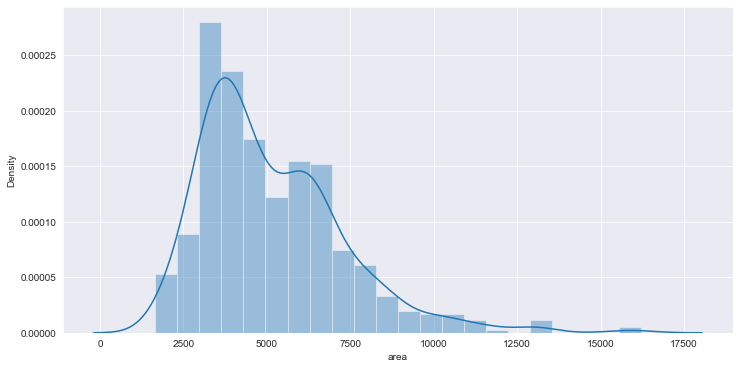

In [10]:
#Plotting distplot for price.
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['area'])
plt.show()

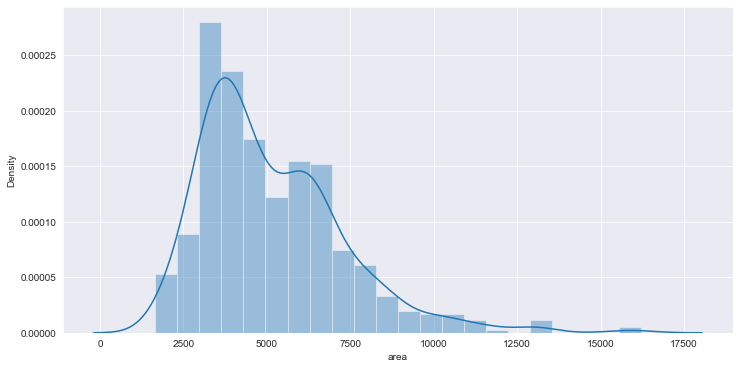

In [11]:
#Plotting distplot for area.
sns.distplot(house['area'])
plt.show()

In [12]:
#Importing libraries.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
import statsmodels.api as sm

In [14]:
##Splitting the features and target.
X=house.iloc[:,1:]
y=house.iloc[:,0]

In [15]:
#Separating the training and testing data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=106)

In [16]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves.
X_endog = sm.add_constant(X_test)

In [17]:
#Model fitting.
res = sm.OLS(y_test, X_endog)
res.fit()

In [18]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     38.01
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.72e-30
Time:                        16:56:59   Log-Likelihood:                -1185.5
No. Observations:                 110   AIC:                             2395.
Df Residuals:                      98   BIC:                             2428.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5707.2498   6862.733     -0.832      0.408   -1.93e+04    7911.620
area           3.6715      0.770      4.766      0.000       2.143       5.200
rooms      -1693.7998   2217.463     -0.764      0.447   -6094.282    2706.683
bathroom    2.461e+04   2739.785      8.981      0.000    1.92e+04       3e+04
floors      6350.7502   1804.987      3.518      0.001    2768.812    9932.688
driveway    8385.3793   3686.781      2.274      0.025    1069.082    1.57e+04
game_room    558.9683   3852.490      0.145      0.885   -7086.172    8204.108
cellar      4811.2191   3059.326      1.573      0.119   -1259.914    1.09e+04
gas        -2803.1208   5905.797     -0.475      0.636   -1.45e+04    8916.741
air         9128.2962   3160.886      2.888      0.005    2855.621    1.54e+04
garage      4343.4259   1607.395      2.702      0.008    1153.603    7533.248
situation   1.341e+04   3534.470      3.794      0.000    6394.887    2.04e+04
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.014
Skew:                           0.012   Prob(JB):                        0.993
Kurtosis:                       3.050   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

<AxesSubplot:xlabel='price'>

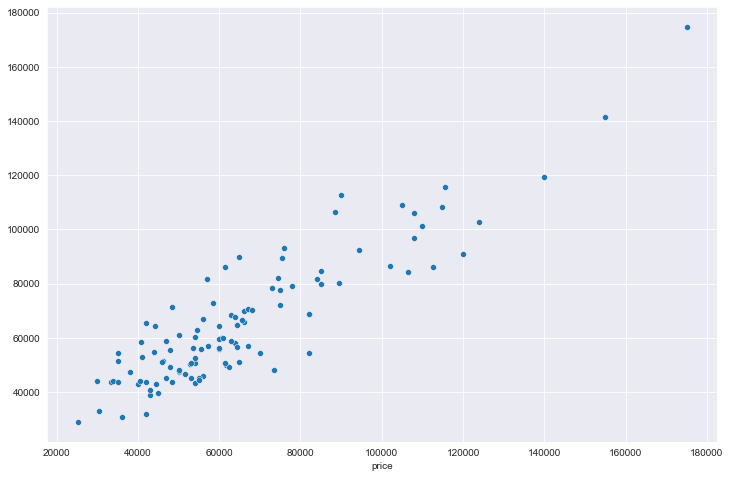

In [20]:
#Checking if there is a linear relationship between the actual and the predicted values.
plt.figure(figsize=(12,8))
sns.scatterplot(y_test, predictions)

In [21]:
pred=pd.DataFrame({'predicted_price':predictions})
pred

,predicted_price
239,44225.299784
56,28980.041121
337,141338.060645
519,86442.363049
39,62844.945507
...,...
98,43656.891716
330,102615.192335
48,49386.905381
120,50745.742798


In [22]:
#Concatenating the actual data with the predicted data and the margin(predicted-actual).
df=pd.concat([X_test,y_test,pred],axis=1).reset_index(drop=True)
df['margin']=df['predicted_price']-df['price']
df

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation,price,predicted_price,margin
0,3000,4,1,2,1,0,0,0,0,0,0,30000,44225.299784,14225.299784
1,2400,3,1,1,0,0,0,0,0,0,0,25245,28980.041121,3735.041121
2,7500,3,3,1,1,0,1,0,1,2,1,155000,141338.060645,-13661.939355
3,6000,3,2,2,1,1,0,0,0,1,0,102000,86442.363049,-15557.636951
4,3150,2,2,1,0,0,1,0,0,0,0,54500,62844.945507,8344.945507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,3500,2,1,1,1,1,0,0,0,0,0,35000,43656.891716,8656.891716
106,7155,3,2,1,1,1,1,0,1,2,0,124000,102615.192335,-21384.807665
107,4960,4,1,3,0,0,0,0,0,0,0,48000,49386.905381,1386.905381
108,4400,2,1,1,1,0,0,0,0,1,0,61500,50745.742798,-10754.257202


Text(0, 0.5, 'Predicted Price')

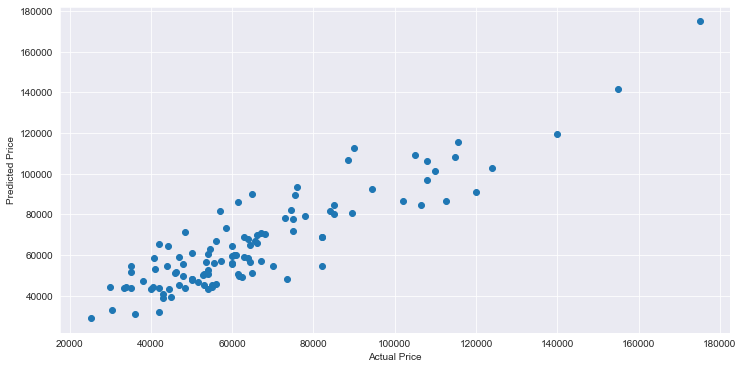

In [23]:
plt.scatter(df['price'],df['predicted_price'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [24]:
df.to_excel('Maison_data_new.xlsx',index=False)
print("DataFrame is written to excel successfully")

DataFrame is written to excel successfully
